# AirBnB Reviews Topic Modelling: Non-Name Entities & Adjectives

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Load Data

In [3]:
def load_review_data(directory):
    """Load Review Data"""
    reviews_df = pd.read_csv(directory + 'interim/review_wrangled.csv', sep=';', lineterminator='\n').drop(columns=['Unnamed: 0'])
    
    return reviews_df

In [2]:
# Select City
country = 'united-states'
city = 'san-francisco'

# Directory
directory = '../data/' + country + '/' + city + '/'

# Load Data
reviews_df = load_review_data(directory)

In [4]:
reviews_df.head(3)

listing_id     id        date  \
0         958   5977  2009-07-23   
1         958   6660  2009-08-03   
2         958  11519  2009-09-27   

                                            comments  \
0  Our experience was, without a doubt, a five st...   
1  Returning to San Francisco is a rejuvenating t...   
2  We were very pleased with the accommodations a...   

                                              tokens  tokens_count  \
0  [experience, without, doubt, five, star, exper...            47   
1  [returning, san, francisco, rejuvenating, thri...            36   
2  [pleased, accommodation, friendly, neighborhoo...            67   

                                       name_entities  name_entities_count  \
0  [David, Haight, Castro, Golden Gate Park, Kare...                    5   
1                      [San Francisco, Holly, David]                    3   
2              [David, Haight Street, Castro Street]                    3   

                                      comments_no_ne  \
0  Our experience was, without a doubt, a five st...   
1  Returning to  is a rejuvenating thrill but thi...   
2  We were very pleased with the accommodations a...   

                                        no_ne_tokens  no_ne_tokens_count  \
0  [experience, without, doubt, five, star, exper...                  39   
1  [returning, rejuvenating, thrill, time, enhanc...                  32   
2  [pleased, accommodation, friendly, neighborhoo...                  62   

                                               nouns  nouns_counts  \
0  [experience, doubt, star, experience, holly, h...            30   
1  [san, francisco, rejuvenating, thrill, time, s...            19   
2  [accommodation, neighborhood, bed, futon, couc...            41   

                                               verbs  verbs_counts  \
0  [be, be, accomodating, honor, be, charm, be, m...            10   
1  [return, be, be, enhance, renovate, locate, ne...            14   
2  [be, be, make, be, have, be, be, meet, be, wal...            21   

                                          adjectives  adjectives_counts  
0     [consummate, full, perfect, full, close, next]                  6  
1                     [great, local, such, amenable]                  4  
2  [pleased, friendly, able, second, helpful, ful...                 16

## Clean Data

In [3]:
import ast

reviews_df['tokens'] = reviews_df['tokens'].map(lambda x: ast.literal_eval(x))
reviews_df['name_entities'] = reviews_df['name_entities'].map(lambda x: ast.literal_eval(x))
reviews_df['no_ne_tokens'] = reviews_df['no_ne_tokens'].map(lambda x: ast.literal_eval(x))
reviews_df['nouns'] = reviews_df['nouns'].map(lambda x: ast.literal_eval(x))
reviews_df['verbs'] = reviews_df['verbs'].map(lambda x: ast.literal_eval(x))
reviews_df['adjectives'] = reviews_df['adjectives'].map(lambda x: ast.literal_eval(x))

# Combine Non-Name Entities and Adjectives

In [5]:
# Add Non-Name Entities Tokens with Adjective Tokens
reviews_df['non_name_entity_and_adj_tokens'] = reviews_df['no_ne_tokens'] + reviews_df['adjectives']

# Count Non-Name Entities & Adjectives
reviews_df['non_name_entity_and_adj_tokens_count'] = reviews_df['non_name_entity_and_adj_tokens'].map(lambda x: len(x))

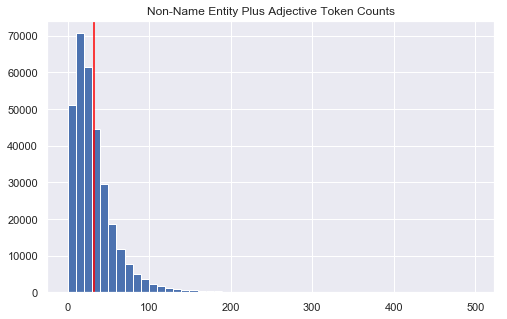

In [7]:
_ = plt.figure(figsize=(8,5))
_ = reviews_df['non_name_entity_and_adj_tokens_count'].hist(bins=50)
_ = plt.axvline(np.mean(np.mean(reviews_df['non_name_entity_and_adj_tokens_count'])), color='red')
np.mean(reviews_df['non_name_entity_and_adj_tokens_count'])
_ = plt.title('Non-Name Entity Plus Adjective Token Counts')

# Topic Modelling: 10 Word Topics

In [8]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamulticore import LdaMulticore
import time

num_topics = 50
num_words = 10
passes = 50

"""Dictionary & Corpus"""
# Get Tokens
token_texts = list(reviews_df['non_name_entity_and_adj_tokens'].values)

# Create a corpus from a list of texts
common_dictionary = Dictionary(token_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in token_texts]

"""LDA Model"""
# Initialize LDA Model
ldam = LdaMulticore

# Get Start Time
start_time = time.time()

# LDA Model
ldam_model = ldam(common_corpus, num_topics=num_topics, id2word=common_dictionary, passes=passes)
model_end_time = time.time() # Model End Time

# LDA Results
results = ldam_model.print_topics(num_topics=num_topics, num_words=num_words)
result_time = time.time() # Results Time

/anaconda3/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.PersistentlyDeprecated2018,


In [9]:
(model_end_time - start_time) / 60 / 60

3.523243648343616

## Save Model

In [10]:
ldam_model.save('../models/ldam_reviews_50topics_10words_50passes_no_ner_plus_adj.model')

# Results

In [1]:
def display_results(results):
    for index, results in results:
        print(str(index) + ': ' + str(', '.join(results.split('"')[1::2])))
        
def display_results_no_duplicates(results):
    all_lists = []
    for index, result in results:
        all_lists = all_lists + result.split('"')[1::2]
    
    # Get Counts of each word
    counts = pd.Series(all_lists).value_counts()
    no_duplicates = counts[counts == 1].index
    
    for index, result in results:
        print(str(index) + ': ' + str(', '.join([word for word in result.split('"')[1::2] if word in no_duplicates])))

### Topic Results

In [7]:
display_results(results)

0: short, main, walk, cosy, handy, professional, brilliant, away, ride, attraction
1: light, noise, bad, upstairs, noisy, loud, night, hear, bit, natural
2: small, new, incredible, roomy, parent, unbeatable, mary, smart, solid, brand
3: lovely, welcoming, warm, home, interesting, charming, host, open, house, inviting
4: cool, whole, full, mission, fun, enough, place, district, really, house
5: beautiful, wonderful, view, host, home, gorgeous, stay, gracious, house, city
6: public, close, happy, transportation, accessible, transport, restaurant, calm, city, easily
7: kitchen, bed, extra, comfy, room, bathroom, space, well, coffee, towel
8: little, responsive, cozy, communicative, cheap, question, knowledgeable, space, host, spot
9: und, die, ist, sehr, wir, war, der, mit, man, auch
10: rent, i, wi-fi, och, var, till, dollar, med, det, som
11: easy, check-in, check, access, get, made, communication, location, communicate, place
12: attentive, muy, que, una, con, casa, para, un, est, n
13

In [8]:
display_results_no_duplicates(results)

0: short, main, cosy, handy, professional, brilliant, ride, attraction
1: light, noise, bad, upstairs, noisy, loud, night, hear, bit, natural
2: small, new, incredible, roomy, parent, unbeatable, mary, smart, solid, brand
3: lovely, welcoming, warm, interesting, charming, open, inviting
4: cool, whole, full, mission, fun, district
5: beautiful, wonderful, gorgeous, gracious
6: public, happy, transportation, accessible, transport, calm, easily
7: kitchen, extra, comfy, well, towel
8: little, responsive, cozy, communicative, cheap, knowledgeable, spot
9: und, die, ist, sehr, wir, war, der, mit, man, auch
10: rent, i, wi-fi, och, var, till, dollar, med, det, som
11: easy, check-in, access, communication, communicate
12: attentive, muy, que, una, con, casa, para, n
13: due, minor, third, understanding, ubicaci, actual, del, buena, limpio, cerca
14: first, free, clear, experience, real, possible, bnb, hidden
15: private, suite, entrance, own, pleased, bath, centro, com
16: quiet, old, uniqu